<a href="https://colab.research.google.com/github/hijera/NN_colab_hw/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BA_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B8_%C2%ABFeature_Selection%C2%BB_%D0%BE%D0%B1%D0%BD%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D0%B5_(%D0%92%D0%BB%D0%B0%D1%81%D0%BE%D0%B2%D0%B0_%D0%90%D0%BD%D1%82%D0%BE%D0%BD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка данных

In [ ]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import seaborn as sns
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
random_seed=77

In [ ]:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1,random_state=random_seed)
data=pd.DataFrame(x_data_generated);

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x_data_generated,
                                                    y_data_generated,
                                                    test_size=0.2,
                                                    random_state=random_seed)

In [ ]:
x_data_generated

array([[ 1.27281289,  0.47167794,  0.38891359, ...,  0.35509823,
        -0.03953472,  0.03129763],
       [-0.1209941 ,  0.63980543, -0.14692273, ..., -0.12723856,
        -2.32456162,  1.00753612],
       [ 1.80924526,  1.53559265, -0.44088979, ...,  0.21960294,
        -0.83313365, -0.93016578],
       ...,
       [-0.66269342, -0.70978382,  0.40212448, ..., -1.19167832,
        -1.15281915,  0.48894708],
       [ 0.94864571, -0.72903147, -0.13717521, ..., -0.65566229,
        -0.29984756, -1.14943557],
       [-1.23290058, -0.08128333, -0.16858885, ..., -0.12036449,
         1.08901873,  1.10133723]])

In [ ]:
cvs_o=cross_val_score(LogisticRegression(), data, y_data_generated, scoring='accuracy').mean()
cvs_len_o=len(pd.DataFrame(x_data_generated).columns)
print(cvs_o)

0.9199999999999999


#Статистические методы

In [ ]:

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.272813,0.471678,0.388914,-1.281786,-0.441448,0.309330,-0.720166,0.462490,0.585600,0.479008,-1.285190,-0.645255,1.621165,-0.931797,1.525020,-0.066958,-0.133430,0.355098,-0.039535,0.031298
1,-0.120994,0.639805,-0.146923,-1.198289,0.131285,0.804277,1.084195,-0.598266,0.688846,0.016207,-0.541468,-0.706417,0.433080,1.371755,-0.037632,0.630522,1.998147,-0.127239,-2.324562,1.007536
2,1.809245,1.535593,-0.440890,-0.890542,0.403389,0.488193,-1.141427,1.291978,0.517800,1.279461,-1.133661,-1.416691,1.521196,0.282249,2.699910,-0.695539,-0.102853,0.219603,-0.833134,-0.930166
3,-0.061419,0.631735,-0.473589,0.236063,0.696780,0.134560,-1.532586,-0.201242,0.125802,0.066248,-0.388676,-0.617370,0.727105,0.548505,0.667515,-0.691247,0.841260,0.481456,1.185033,-0.459882
4,0.264371,-1.380769,0.470473,-1.286056,-1.882886,-2.488148,1.091902,-0.348394,0.617680,-2.287118,-0.608054,-0.328794,0.508965,1.127797,1.299577,1.284107,-0.921327,0.015339,0.206919,-2.055987


<Axes: >

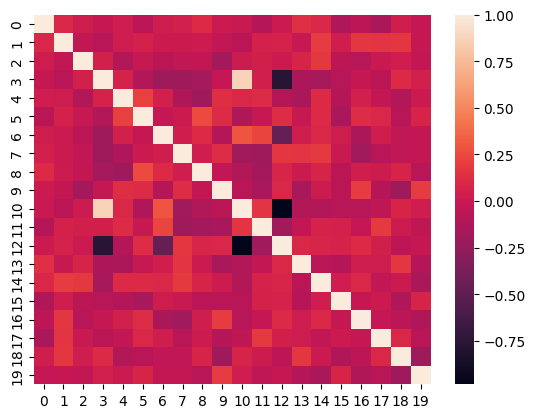

In [ ]:
data_correlated=data.copy()
#Строим матроцу коррелляции
corr=data.corr()
corr_abs=data.corr().abs()
# plot the heatmap
sns.heatmap(corr)


<Axes: >

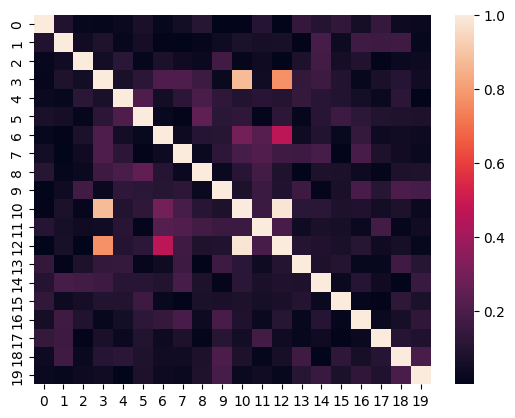

In [ ]:
sns.heatmap(corr_abs)

In [ ]:
proc=0.3

upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))


to_drop = [column for column in upper.columns if any(upper[column] > proc)]

print(to_drop)
cvs_len=len(data.columns.values)-len(to_drop)

data_correlated=data_correlated.drop(data_correlated[to_drop], axis=1)
data_correlated.head()

[10, 12]


,0,1,2,3,4,5,6,7,8,9,11,13,14,15,16,17,18,19
0,1.272813,0.471678,0.388914,-1.281786,-0.441448,0.309330,-0.720166,0.462490,0.585600,0.479008,-0.645255,-0.931797,1.525020,-0.066958,-0.133430,0.355098,-0.039535,0.031298
1,-0.120994,0.639805,-0.146923,-1.198289,0.131285,0.804277,1.084195,-0.598266,0.688846,0.016207,-0.706417,1.371755,-0.037632,0.630522,1.998147,-0.127239,-2.324562,1.007536
2,1.809245,1.535593,-0.440890,-0.890542,0.403389,0.488193,-1.141427,1.291978,0.517800,1.279461,-1.416691,0.282249,2.699910,-0.695539,-0.102853,0.219603,-0.833134,-0.930166
3,-0.061419,0.631735,-0.473589,0.236063,0.696780,0.134560,-1.532586,-0.201242,0.125802,0.066248,-0.617370,0.548505,0.667515,-0.691247,0.841260,0.481456,1.185033,-0.459882
4,0.264371,-1.380769,0.470473,-1.286056,-1.882886,-2.488148,1.091902,-0.348394,0.617680,-2.287118,-0.328794,1.127797,1.299577,1.284107,-0.921327,0.015339,0.206919,-2.055987


In [ ]:
cvs_stat_corr=cross_val_score(LogisticRegression(), data_correlated, y_data_generated, scoring='accuracy').mean()
print(cvs_stat_corr)

0.9099999999999999


In [ ]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)

    print(selector.get_support())
    return data[data.columns[selector.get_support(indices=True)]]


data_thr=data.copy()
data_thr=variance_threshold_selector(data_thr,0.9)
cvs_len_thr=len(data_thr.columns)

data_thr.head()


[False False False  True  True False  True False  True  True  True False
  True  True  True False  True  True  True  True]


,3,4,6,8,9,10,12,13,14,16,17,18,19
0,-1.281786,-0.441448,-0.720166,0.585600,0.479008,-1.285190,1.621165,-0.931797,1.525020,-0.133430,0.355098,-0.039535,0.031298
1,-1.198289,0.131285,1.084195,0.688846,0.016207,-0.541468,0.433080,1.371755,-0.037632,1.998147,-0.127239,-2.324562,1.007536
2,-0.890542,0.403389,-1.141427,0.517800,1.279461,-1.133661,1.521196,0.282249,2.699910,-0.102853,0.219603,-0.833134,-0.930166
3,0.236063,0.696780,-1.532586,0.125802,0.066248,-0.388676,0.727105,0.548505,0.667515,0.841260,0.481456,1.185033,-0.459882
4,-1.286056,-1.882886,1.091902,0.617680,-2.287118,-0.608054,0.508965,1.127797,1.299577,-0.921327,0.015339,0.206919,-2.055987


In [ ]:
cvs_stat_vt=cross_val_score(LogisticRegression(), data_thr, y_data_generated, scoring='accuracy').mean()
print(cvs_stat_vt)

0.9099999999999999


#Дисперсионный анализ

In [ ]:
from sklearn.feature_selection import SelectKBest
X_disp=SelectKBest( k=5).fit_transform(x_data_generated, y_data_generated)
cvs_len_disp=len(pd.DataFrame(X_disp).columns)

cvs_disp=cross_val_score(LogisticRegression(), X_disp, y_data_generated, scoring='accuracy').mean()
print(cvs_disp)

0.9200000000000002


#Отбор с использованием моделей

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
#Отбор признаков с помощью логистической регрессии
LR_L1 = LogisticRegression(penalty='l1', random_state=random_seed, solver='saga', max_iter=1000)


mdl_select=SelectFromModel(LR_L1).fit(x_data_generated,y_data_generated)
X_sel = mdl_select.transform(x_data_generated)
cvs_len_l1=len(pd.DataFrame(x_data_generated).columns)
cvs_s_l1=cross_val_score(LogisticRegression(), X_sel, y_data_generated, scoring='accuracy').mean()
print(cvs_s_l1)

0.93


In [ ]:
#Отбор признаков с помощью Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=random_seed).fit(x_data_generated,y_data_generated)
column_names = list(data.columns.values)
feature_scores = pd.Series(rf.feature_importances_, index=column_names).sort_values(ascending=False)

feature_scores

10    0.298269
3     0.286600
12    0.172994
6     0.030010
11    0.025395
18    0.023760
7     0.021968
13    0.017749
5     0.015721
19    0.012929
8     0.011610
15    0.011385
0     0.011263
2     0.011063
17    0.010901
14    0.010224
16    0.009001
4     0.007193
9     0.006701
1     0.005264
dtype: float64

In [ ]:
#Отбираем параметры с максимальным feature_scores
feature_selected_rf=feature_scores.where(lambda x : x>0.05).dropna().index.tolist()
print(feature_selected_rf)
X_rfr=data[feature_selected_rf].copy()
cvs_len_rf=len(feature_selected_rf)

cvs_rf=cross_val_score(LogisticRegression(), X_rfr, y_data_generated, scoring='accuracy').mean()
print(cvs_rf)

[10, 3, 12]
0.9200000000000002


In [ ]:
#Отбор через RFECV
from sklearn.feature_selection import RFECV

rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error").fit(X_train,y_train)



In [ ]:
selected_features = np.array(data.columns.values)[rfe.get_support()]
print(selected_features)
X_rfe=data[selected_features].copy()
cvs_len_rfecv=len(selected_features)

X_rfe.head()

[ 3  6 10 12]


,3,6,10,12
0,-1.281786,-0.720166,-1.285190,1.621165
1,-1.198289,1.084195,-0.541468,0.433080
2,-0.890542,-1.141427,-1.133661,1.521196
3,0.236063,-1.532586,-0.388676,0.727105
4,-1.286056,1.091902,-0.608054,0.508965


In [ ]:
cvs_rfecv=cross_val_score(LogisticRegression(), X_rfe, y_data_generated, scoring='accuracy').mean()
print(cvs_rfecv)

0.9200000000000002


#Перебор признаков

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train, y_train)
sfs_sel=SequentialFeatureSelector(ridge, n_features_to_select=5, direction="forward").fit(X_train,y_train).get_support(indices=True)
cvs_len_sel=len(sfs_sel);
data_sfs=data[data.columns[sfs_sel]]
cvs_sfs=cross_val_score(LogisticRegression(), data_sfs, y_data_generated, scoring='accuracy').mean()
print(cvs_sfs)

0.9200000000000002


#Выводы

Сравним cross_val_score:

In [ ]:
pd.DataFrame([
    ['Без выбора',cvs_len_o,cvs_o],
     ['На основании корреляции',cvs_len,cvs_stat_corr],
    ['VarianceThreshold',cvs_len_thr,cvs_stat_vt],
    ['Дисперсионный анализ',cvs_len_disp,cvs_disp],
    ['Модель Логистической регрессии (L1)',cvs_len_l1,cvs_s_l1],
    ['Random Forest Classifier feature importance',cvs_len_rf,cvs_rf],
    ['RFECV',cvs_len_rfecv,cvs_rfecv],
    ['Перебор признаков',cvs_len_sel,cvs_sfs]
    ],
             columns=['способ выбора признаков','количество признаков','средняя точность модели'])

,способ выбора признаков,количество признаков,средняя точность модели
0,Без выбора,20,0.92
1,На основании корреляции,18,0.91
2,VarianceThreshold,13,0.91
3,Дисперсионный анализ,5,0.92
4,Модель Логистической регрессии (L1),20,0.93
5,Random Forest Classifier feature importance,3,0.92
6,RFECV,4,0.92
7,Перебор признаков,5,0.92


Как мы видим, отбор определенных признаков не всегда гарантирует улучшение качества модели (Variance Threshold и анализ корреляции признаков ухудшило качество модели), однако, при использовании опредленных методов, сокращение признаков повышает точность модели (Логистическая регрессия для признаков привела к повышению точности)